In [ ]:
import pandas as pd

import seaborn as sns
import glob
from matplotlib import pyplot as plt

In [ ]:
16*5

In [57]:
!ls ../logs/aug/cnn

cnn_i_1_latent_0.025.csv cnn_i_4_latent_0.025.csv cnn_i_7_latent_0.025.csv
cnn_i_1_latent_0.05.csv  cnn_i_4_latent_0.05.csv  cnn_i_7_latent_0.05.csv
cnn_i_1_latent_0.1.csv   cnn_i_4_latent_0.1.csv   cnn_i_7_latent_0.1.csv
cnn_i_1_latent_0.2.csv   cnn_i_4_latent_0.2.csv   cnn_i_7_latent_0.2.csv
cnn_i_2_latent_0.025.csv cnn_i_5_latent_0.025.csv cnn_i_8_latent_0.025.csv
cnn_i_2_latent_0.05.csv  cnn_i_5_latent_0.05.csv  cnn_i_8_latent_0.05.csv
cnn_i_2_latent_0.1.csv   cnn_i_5_latent_0.1.csv   cnn_i_8_latent_0.1.csv
cnn_i_2_latent_0.2.csv   cnn_i_5_latent_0.2.csv   cnn_i_8_latent_0.2.csv
cnn_i_3_latent_0.025.csv cnn_i_6_latent_0.025.csv cnn_i_9_latent_0.025.csv
cnn_i_3_latent_0.05.csv  cnn_i_6_latent_0.05.csv  cnn_i_9_latent_0.05.csv
cnn_i_3_latent_0.1.csv   cnn_i_6_latent_0.1.csv   cnn_i_9_latent_0.1.csv
cnn_i_3_latent_0.2.csv   cnn_i_6_latent_0.2.csv   cnn_i_9_latent_0.2.csv


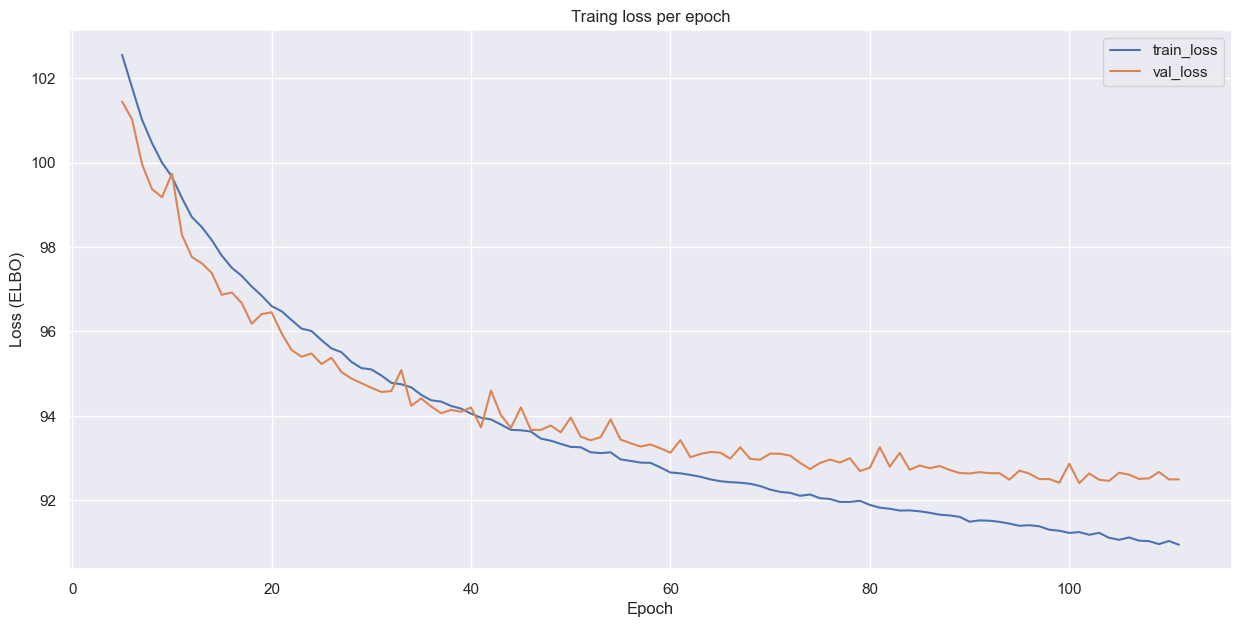

In [59]:
sns.set_theme()

df = pd.read_csv("../logs/aug/cnn/cnn_i_5_latent_0.2.csv").iloc[5:].loc[:, [ 'train_loss', 'val_loss']]

ax = df.plot(title='Traing loss per epoch', figsize=(15, 7))

# Add x and y labels
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss (ELBO)')


plt.savefig('cnn_arch_overfitting.pdf')

In [ ]:
df

In [43]:
train_loss, val_loss = {}, {}

for x in glob.glob("../logs/aug/cnn/*.csv"):
    # print(x)
    latent_factor = float(x.split("latent_")[1].split('.csv')[0])
    # print(latent_factor)
    i = float(x.split("i_")[1].split('_latent')[0])
    # print(i)

    df = pd.read_csv(x).iloc[-1]


    train_loss[(latent_factor, int(16*i))] = df.train_loss
    val_loss[(latent_factor, int(16*i))] = df.val_loss

df = pd.DataFrame({'train_loss': pd.Series(train_loss), 'val_loss': pd.Series(val_loss)}).sort_index(axis=0).sort_index(axis=1).loc[:, 'train_loss']

df = df.unstack()

df.index.name = 'latent_factor'
df.columns.name = '# filters 1st layer'


latex_code = df.T.to_latex(escape=False, multicolumn=True, multirow=True, float_format="%.2f")
print(latex_code)


\begin{tabular}{lrrrr}
\toprule
latent_factor & 0.025000 & 0.050000 & 0.100000 & 0.200000 \\
# filters 1st layer &  &  &  &  \\
\midrule
16 & 95.30 & 95.61 & 95.45 & 95.89 \\
32 & 92.76 & 92.82 & 93.12 & 92.93 \\
48 & 91.54 & 91.57 & 92.02 & 92.29 \\
64 & 91.16 & 92.47 & 91.60 & 91.21 \\
80 & 90.91 & 90.93 & 91.27 & 90.95 \\
96 & 90.77 & 90.87 & 90.88 & 89.87 \\
112 & 89.92 & 89.73 & 90.58 & 91.58 \\
128 & 99.92 & 89.64 & 90.40 & 90.93 \\
144 & 103.88 & 90.39 & 90.02 & 90.12 \\
\bottomrule
\end{tabular}



In [34]:
df.mean()

# filters 1st layer
16      94.766489
32      92.723183
48      92.254384
64      92.296173
80      92.393905
96      92.377660
112     92.822557
128     96.982626
144    103.379441
dtype: float64

In [35]:
df.std()

# filters 1st layer
16      0.431929
32      0.240462
48      0.429656
64      0.336640
80      0.110242
96      0.120059
112     0.349130
128     8.432852
144    13.062542
dtype: float64

In [45]:
train_loss, val_loss = {}, {}

for x in glob.glob("../logs/aug/cnn/*.csv"):
    # print(x)
    latent_factor = float(x.split("latent_")[1].split('.csv')[0])
    # print(latent_factor)
    i = float(x.split("i_")[1].split('_latent')[0])
    # print(i)

    df = pd.read_csv(x).iloc[-1]


    train_loss[(latent_factor, int(16*i))] = df.train_loss
    val_loss[(latent_factor, int(16*i))] = df.val_loss

df = pd.DataFrame({'train_loss': pd.Series(train_loss), 'val_loss': pd.Series(val_loss)}).sort_index(axis=0).sort_index(axis=1).loc[:, 'val_loss']

df = df.unstack()

df.index.name = 'latent_factor'
df.columns.name = '# filters 1st layer'




In [46]:
df.mean()

# filters 1st layer
16     94.766489
32     92.723183
48     92.254384
64     92.296173
80     92.393905
96     92.377660
112    92.822557
128    96.982626
144    98.279496
dtype: float64

In [47]:
df.unstack().mean(axis=0)

93.87738584513924

In [48]:
!ls ../logs/aug/new_start_base
import glob

batch_norm_False.csv               layers_3_geo_flat_latent_0.025.csv
batch_norm_True.csv                layers_3_geo_flat_latent_0.05.csv
batch_size_1024.csv                layers_3_geo_flat_latent_0.1.csv
batch_size_128.csv                 layers_3_geo_flat_latent_0.2.csv
batch_size_2048.csv                layers_3_geo_geo.csv
batch_size_256.csv                 layers_3_geo_geo_latent_0.025.csv
batch_size_4096.csv                layers_3_geo_geo_latent_0.05.csv
batch_size_512.csv                 layers_3_geo_geo_latent_0.1.csv
batch_size_64.csv                  layers_3_geo_geo_latent_0.2.csv
drop_out_std_0.0.csv               layers_4_geo_flat.csv
drop_out_std_0.1.csv               layers_4_geo_flat_latent_0.025.csv
drop_out_std_0.2.csv               layers_4_geo_flat_latent_0.05.csv
drop_out_std_0.3.csv               layers_4_geo_flat_latent_0.1.csv
drop_out_std_0.4.csv               layers_4_geo_flat_latent_0.2.csv
drop_out_std_0.5.csv               layers_4_geo_geo.csv
drop_out_v

In [49]:
train_loss, val_loss = {}, {}

for x in glob.glob("../logs/aug/new_start_base/layers_*latent*.csv"):
    # print(x)
    latent_factor = float(x.split("latent_")[1].split('.csv')[0])
    n_layers = int(x.split('layers_')[1].split('_')[0]) - 1
    geo = x.split('/')[-1].split('_')[3].split('_')[0]
    df = pd.read_csv(x).iloc[-1]

    train_loss[(geo, n_layers, latent_factor)] = df.train_loss
    val_loss[(geo, n_layers, latent_factor)] = df.val_loss

df = pd.DataFrame({'train_loss': pd.Series(train_loss), 'val_loss': pd.Series(val_loss)}).sort_index(axis=0).sort_index(axis=1)
df.columns.name = 'metric'
df.index.names = ['geometry', 'n layers', 'latent factor']
df = df.unstack('latent factor').loc[:, 'train_loss']

output = df.sort_index(axis=0).sort_index(axis=1)
output

latent factor           0.025       0.050       0.100       0.200
geometry n layers                                                
flat     1          99.807106  100.480297  100.402948  100.597085
         2          95.020544   95.786396   94.757694   95.666391
         3          93.044667   94.227868   92.580026   92.942346
         4          96.052614   95.966020   93.608009   92.912639
geo      1         101.607609  101.589012  101.786489  101.918818
         2          96.422280   96.631558   96.428265   96.288839
         3          93.816316   94.333568   93.835394   93.833614
         4          93.847609   94.577634   94.605043   94.064630

In [50]:

latex_code = output.to_latex(escape=False, multicolumn=True, multirow=True, float_format="%.2f")
print(latex_code)

\begin{tabular}{llrrrr}
\toprule
 & latent factor & 0.025000 & 0.050000 & 0.100000 & 0.200000 \\
geometry & n layers &  &  &  &  \\
\midrule
\multirow[t]{4}{*}{flat} & 1 & 99.81 & 100.48 & 100.40 & 100.60 \\
 & 2 & 95.02 & 95.79 & 94.76 & 95.67 \\
 & 3 & 93.04 & 94.23 & 92.58 & 92.94 \\
 & 4 & 96.05 & 95.97 & 93.61 & 92.91 \\
\cline{1-6}
\multirow[t]{4}{*}{geo} & 1 & 101.61 & 101.59 & 101.79 & 101.92 \\
 & 2 & 96.42 & 96.63 & 96.43 & 96.29 \\
 & 3 & 93.82 & 94.33 & 93.84 & 93.83 \\
 & 4 & 93.85 & 94.58 & 94.61 & 94.06 \\
\cline{1-6}
\bottomrule
\end{tabular}



In [85]:
df

metric                                        train_loss  \
latent_factor                                      0.010   
geometry n_layers                                          
flat     1         \cellcolor[rgb]{0.00,0.41,0.22}105.25   
         2         \cellcolor[rgb]{0.00,0.41,0.22}103.97   
         3          \cellcolor[rgb]{0.07,0.54,0.28}92.68   
geo      1         \cellcolor[rgb]{0.00,0.41,0.22}107.76   
         2         \cellcolor[rgb]{0.00,0.41,0.22}107.68   
         3          \cellcolor[rgb]{0.05,0.50,0.26}95.26   

metric                                                   \
latent_factor                                     0.025   
geometry n_layers                                         
flat     1         \cellcolor[rgb]{0.03,0.47,0.25}96.79   
         2         \cellcolor[rgb]{0.08,0.56,0.30}91.64   
         3         \cellcolor[rgb]{0.14,0.62,0.32}88.35   
geo      1         \cellcolor[rgb]{0.00,0.42,0.22}99.47   
         2         \cellcolor[rgb]{0.06,0.52,0.27}93.80   
         3         \cellcolor[rgb]{0.06,0.53,0.28}93.66   

metric                                                    \
latent_factor                                      0.050   
geometry n_layers                                          
flat     1          \cellcolor[rgb]{0.02,0.44,0.23}97.69   
         2          \cellcolor[rgb]{0.08,0.56,0.30}91.77   
         3          \cellcolor[rgb]{0.14,0.62,0.32}88.43   
geo      1         \cellcolor[rgb]{0.00,0.41,0.22}100.32   
         2          \cellcolor[rgb]{0.06,0.52,0.27}93.92   
         3          \cellcolor[rgb]{0.05,0.50,0.26}95.29   

metric                                                   \
latent_factor                                     0.100   
geometry n_layers                                         
flat     1         \cellcolor[rgb]{0.02,0.44,0.23}97.89   
         2         \cellcolor[rgb]{0.09,0.58,0.30}90.91   
         3         \cellcolor[rgb]{0.12,0.60,0.32}89.34   
geo      1         \cellcolor[rgb]{0.00,0.41,0.22}99.98   
         2         \cellcolor[rgb]{0.07,0.53,0.28}93.10   
         3         \cellcolor[rgb]{0.01,0.43,0.23}98.71   

metric                                                   \
latent_factor                                     0.200   
geometry n_layers                                         
flat     1         \cellcolor[rgb]{0.02,0.44,0.23}97.73   
         2         \cellcolor[rgb]{0.09,0.57,0.30}91.08   
         3         \cellcolor[rgb]{0.08,0.56,0.30}91.45   
geo      1         \cellcolor[rgb]{0.00,0.41,0.22}99.79   
         2         \cellcolor[rgb]{0.06,0.52,0.27}93.86   
         3         \cellcolor[rgb]{0.00,0.41,0.22}99.68   

metric                                          val_loss  \
latent_factor                                      0.010   
geometry n_layers                                          
flat     1         \cellcolor[rgb]{0.00,0.41,0.22}108.81   
         2         \cellcolor[rgb]{0.00,0.41,0.22}107.97   
         3         \cellcolor[rgb]{0.00,0.41,0.22}101.91   
geo      1         \cellcolor[rgb]{0.00,0.41,0.22}110.14   
         2         \cellcolor[rgb]{0.00,0.41,0.22}109.53   
         3         \cellcolor[rgb]{0.00,0.41,0.22}102.03   

metric                                                    \
latent_factor                                      0.025   
geometry n_layers                                          
flat     1          \cellcolor[rgb]{0.02,0.44,0.23}97.86   
         2          \cellcolor[rgb]{0.05,0.50,0.26}95.15   
         3          \cellcolor[rgb]{0.04,0.49,0.26}95.59   
geo      1          \cellcolor[rgb]{0.00,0.41,0.22}99.69   
         2          \cellcolor[rgb]{0.04,0.47,0.25}96.17   
         3         \cellcolor[rgb]{0.00,0.41,0.22}100.09   

metric                                                    \
latent_factor                                      0.050   
geometry n_layers                                          
flat     1          \cellcolor[rgb]{0.02,0.44,0.23}98.33   


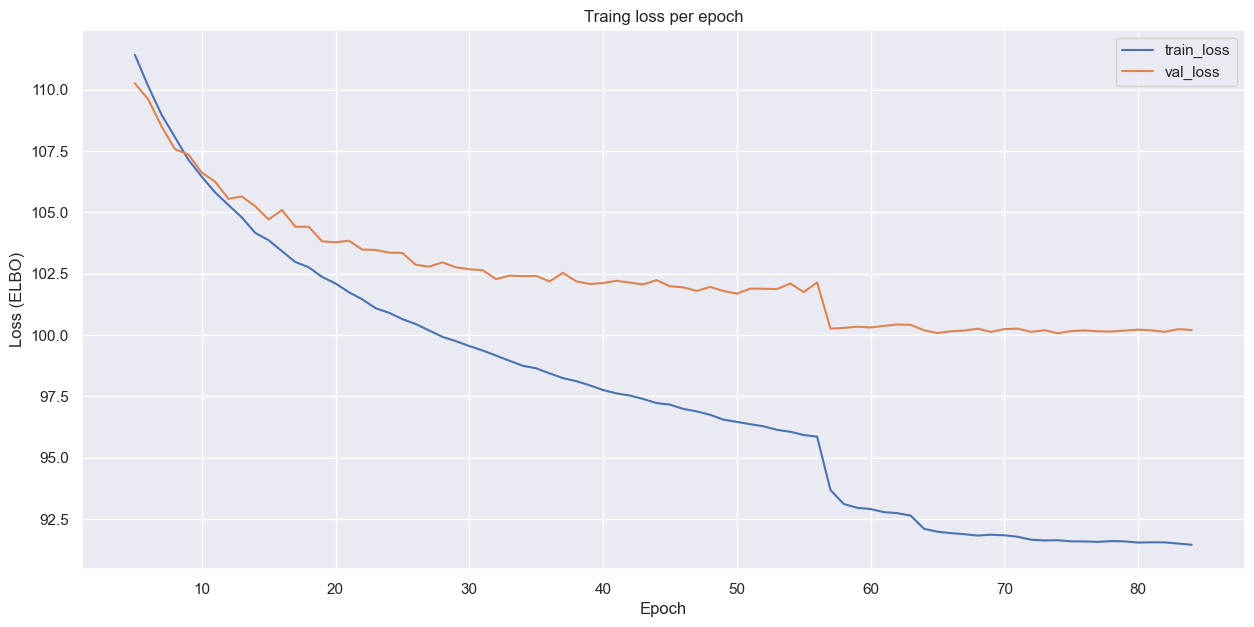

In [124]:
sns.set_theme()

df = pd.read_csv("../logs/aug/base_model/stats_layers-4_geo-flat_latent_f-0.2.csv").loc[:, [ 'train_loss', 'val_loss']].iloc[5:]

ax = df.plot(title='Traing loss per epoch', figsize=(15, 7))

# Add x and y labels
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss (ELBO)')


plt.savefig('flatten_arch_overfitting.pdf')